**Набір даних Grocery Database**
https://docs.google.com/spreadsheets/d/1qNHwCx3uHS05rmtglg4pYlqOdeJxKo9E/edit#gid=872187135

*Назва проекту:* Аналіз роздрібного магазину

*Опис проекту:* Цей проект був створений для аналізу та візуалізації даних роздрібного магазину. Він включає в себе обробку даних, побудову графіків, визначення популярних товарів, вивчення покупців за різними параметрами, розрахунок прибутку та інші аспекти аналізу.

*Функціональність проекту:*
- Обробка та підготовка даних для аналізу.
- Візуалізація даних за допомогою графіків та діаграм.
- Визначення популярних категорій товарів.
- Аналіз покупців за різними параметрами, такими як вік, стать, країна.
- Розрахунок прибутку та прибутковості за категоріями товарів.
- Виведення висновків та рекомендацій для бізнесу на основі аналізу даних.

*Мови та інструменти:* Python, pandas, matplotlib, seaborn.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd
import warnings

**1. Аналіз даних перед початком роботи**

In [2]:
df = pd.read_excel('C:/Users/User/Desktop/python for DA/data/Grocery Database.xlsx')

In [3]:
df_clean= df.copy()

In [4]:
#огляд набору даних
df_clean

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


In [5]:
#огляд типів данних
df_clean.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [6]:
type(df_clean)

pandas.core.frame.DataFrame

In [7]:
#огляд розміру даних
df_shape = df_clean.shape
df_shape

(50447, 32)

In [8]:
#перевірка на наявність пустих значень
df_clean.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [9]:
#перевірка на наявність дублікатів
duplicateRows = df_clean[df_clean.duplicated (keep=False)]
duplicateRows

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [10]:
#видалення дублікатів
df_clean = df_clean.drop_duplicates()

In [11]:
duplicateRows = df_clean[df_clean.duplicated (keep=False)]
duplicateRows

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost


In [15]:
# вимкнення повідомлень про попередження
warnings.filterwarnings("ignore")

In [17]:
# створення параметру повноъ дати та часу
df_clean['Time'] = df_clean['Time'].astype(str)
df_clean['Time'] = df_clean['Time'].str.replace(r'\.\d+', '', regex=True)
df_clean['Time'] = pd.to_datetime(df_clean['Time'], format='%H:%M:%S')
df_clean['Datetime'] = df_clean['Date'] + pd.to_timedelta(df_clean['Time'].dt.strftime('%H:%M:%S'))

In [18]:
df_clean

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Datetime
0,GIJ00001,2016-01-02,2016,1,1900-01-01 10:08:03,9793548581,MIDID0001,1,36,Male,...,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,2016-01-02 10:08:03
1,GIJ00002,2016-01-02,2016,1,1900-01-01 15:46:50,9938441276,MIDID0002,2,54,Male,...,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,2016-01-02 15:46:50
2,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,1,16,Female,...,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,2016-01-02 11:28:52
3,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,1,16,Female,...,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,2016-01-02 11:28:52
4,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,2,16,Female,...,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,2016-01-02 11:28:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,1900-01-01 20:59:27,9893317658,MIDSG0630,21,28,Female,...,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580,2019-12-28 20:59:27
50443,GSW01534,2019-12-29,2019,12,1900-01-01 13:14:45,9809301701,MIDSG0293,41,28,Female,...,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816,2019-12-29 13:14:45
50444,GSW01535,2019-12-30,2019,12,1900-01-01 10:01:32,9840124138,MIDSG0150,41,62,Female,...,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177,2019-12-30 10:01:32
50445,GSW01535,2019-12-30,2019,12,1900-01-01 10:01:32,9840124138,MIDSG0150,41,62,Female,...,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820,2019-12-30 10:01:32


*Під час обробки даних та підготовки до подальшого аналізу було вирішено перевести окремі стовпці в категоріальний формат. Це рішення ґрунтується на кількох обґрунтованих факторах, які підвищують якість та ефективність аналізу даних: ефективність пам’яті, швидкість обробки даних та зручність аналізу даних.*

In [19]:
df_clean['Gender'] = pd.Categorical(df_clean['Gender'])
df_clean['Country'] = pd.Categorical(df_clean['Country'])
df_clean['City'] = pd.Categorical(df_clean['City'])
df_clean['Payment Mode'] = pd.Categorical(df_clean['Payment Mode'])

In [25]:
#алаштування відображення даних аби можна було переглянути всі колонки набору даних та
#поглянемо на перші 10 рядків
pd.set_option('display.max_columns', None)

df_clean[:10]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Datetime
0,GIJ00001,2016-01-02,2016,1,1900-01-01 10:08:03,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,2016-01-02 10:08:03
1,GIJ00002,2016-01-02,2016,1,1900-01-01 15:46:50,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,2016-01-02 15:46:50
2,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,2016-01-02 11:28:52
3,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,2016-01-02 11:28:52
4,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,2016-01-02 11:28:52
5,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,ThyGrace Romanine lettuce,ThyGrace,100 g,2.81,1,0.01,2.7819,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.33720,0.4215,2.05130,2016-01-02 11:28:52
6,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,YUVVO French Bean,YUVVO,260 g,3.28,1,0.01,3.2472,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.31160,0.4920,2.47640,2016-01-02 11:28:52
7,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,4,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,ThyGrace Holland potato,ThyGrace,690 g,3.75,1,0.01,3.7125,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.35625,0.5625,2.83125,2016-01-02 11:28:52
8,GIJ00004,2016-01-03,2016,1,1900-01-01 20:52:55,9800896004,MIDID0004,0,20,Female,Jakarta,Indonesia,Pet Care,Dog Food & Trat,Lamb pate dog food,Nature's Gift,600 g,5.84,1,0.02,5.7232,21.1974,0.1,23.31714,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968,2016-01-03 20:52:55
9,GIJ00004,2016-01-03,2016,1,1900-01-01 20:52:55,9800896004,MIDID0004,1,20,Female,Jakarta,Indonesia,Pet Care,Pet Food,Nutro Beef with vegetables dog food,Nutro,270 g,7.30,1,0.02,7.1540,21.1974,0.1,23.31714,Cash,BDO Unibank,0.076,0.15,0.774,0.55480,1.0950,5.65020,2016-01-03 20:52:55


In [27]:
pd.reset_option('display.max_columns')

*Перевіримо коректність розрахункових даних щодо рахунків, в яких більше однієї позиції*

In [26]:
df_clean[df_clean['Receipt Number'] == 'GIJ00003'].Amount.sum()

30.769199999999998

*Бачимо, що розрахунок "Net Bill Amount" та "Gross Bill Amount" некоректний, у таблиці він становить 38.3526, а наш перерахунок дав результат 30.7692. 
Було прийнято рішення перерахувати дані для цих двох стовпців і створити нові стовпці з правильними даними, які представляють суми в стовпцях «Net Bill Amount Correct» та «Gross Bill Amount Correct».
Ця дія допомагає забезпечити точність аналізу даних і усуває можливі помилки, які можуть вплинути на результати ваших подальших досліджень або візуалізацій.*

In [43]:
df_clean['Net Bill Amount Correct'] = 0.0
df_clean['Net Bill Amount Correct'] = df_clean.Price * df_clean.QTY * (1 - (df_clean.DISC))

In [44]:
df_clean['Gross Bill Amount Correct'] = 0.0
df_clean['Gross Bill Amount Correct'] = df_clean['Net Bill Amount Correct'] * (1 + (df_clean.GST))

In [33]:
df_clean

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Datetime,Net Bill Amount Correct,Gross Bill Amount Correct
0,GIJ00001,2016-01-02,2016,1,1900-01-01 10:08:03,9793548581,MIDID0001,1,36,Male,...,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,2016-01-02 10:08:03,12.1128,13.324080
1,GIJ00002,2016-01-02,2016,1,1900-01-01 15:46:50,9938441276,MIDID0002,2,54,Male,...,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,2016-01-02 15:46:50,22.9680,25.264800
2,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,1,16,Female,...,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,2016-01-02 11:28:52,13.1769,14.494590
3,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,1,16,Female,...,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,2016-01-02 11:28:52,3.4848,3.833280
4,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,2,16,Female,...,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,2016-01-02 11:28:52,4.3659,4.802490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,1900-01-01 20:59:27,9893317658,MIDSG0630,21,28,Female,...,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580,2019-12-28 20:59:27,6.0760,6.501320
50443,GSW01534,2019-12-29,2019,12,1900-01-01 13:14:45,9809301701,MIDSG0293,41,28,Female,...,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816,2019-12-29 13:14:45,10.5536,11.292352
50444,GSW01535,2019-12-30,2019,12,1900-01-01 10:01:32,9840124138,MIDSG0150,41,62,Female,...,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177,2019-12-30 10:01:32,3.9303,4.205421
50445,GSW01535,2019-12-30,2019,12,1900-01-01 10:01:32,9840124138,MIDSG0150,41,62,Female,...,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820,2019-12-30 10:01:32,4.0590,4.343130


In [35]:
#змінимо відображення кількості цифр після коми до 3 та розглянемо статистичні показники даних
with pd.option_context('display.precision', 3):
    display(df.describe())

,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
count,50447.000,50447.000,5.045e+04,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,5.045e+04,50447.000,50447.000,50447.000,50447.000
mean,2017.668,6.477,9.894e+09,18.364,35.802,7.424,1.548,0.030,11.168,66.695,0.086,72.379,0.106,1.500e-01,0.744,1.202,1.727,8.584
std,1.112,3.454,7.636e+07,16.161,14.020,4.754,0.648,0.014,9.227,45.270,0.024,49.094,0.029,1.321e-13,0.029,1.064,1.427,7.135
min,2016.000,1.000,7.920e+09,0.000,15.000,0.840,1.000,0.010,0.798,0.978,0.060,1.037,0.051,1.500e-01,0.700,0.068,0.126,0.610
25%,2017.000,3.000,9.839e+09,6.000,23.000,4.280,1.000,0.020,5.214,35.328,0.070,38.616,0.083,1.500e-01,0.722,0.546,0.805,4.083
50%,2018.000,7.000,9.897e+09,14.000,35.000,5.980,2.000,0.030,8.633,58.586,0.070,63.909,0.109,1.500e-01,0.741,0.928,1.329,6.649
75%,2019.000,10.000,9.950e+09,26.000,47.000,9.470,2.000,0.040,14.016,90.585,0.100,98.076,0.128,1.500e-01,0.767,1.505,2.178,10.829
max,2019.000,12.000,1.000e+10,116.000,75.000,40.330,9.000,0.050,299.827,527.668,0.120,559.328,0.150,1.500e-01,0.799,26.235,46.848,239.237


# Аналіз продажів

**1.1 Як продажі змінюються з часом? Чи є езонні піки і спади?**

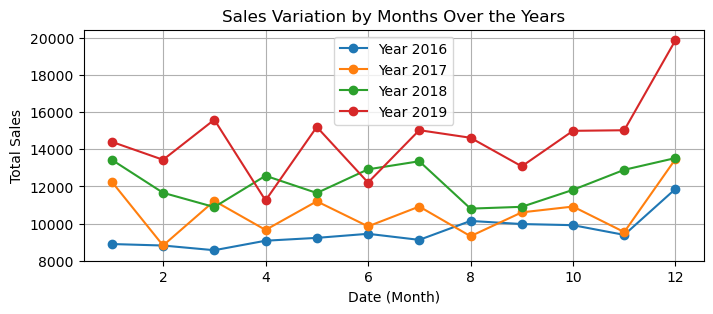

In [36]:
monthly_sales = df_clean.groupby(['Year', 'Month'])['Net Bill Amount Correct'].sum()

years = df_clean['Year'].unique()

plt.figure(figsize=(8, 3))
for year in years:
    monthly_sales_year = monthly_sales[year]
    plt.plot(monthly_sales_year.index, monthly_sales_year.values, marker='o', label=f'Year {year}')

plt.title('Sales Variation by Months Over the Years')
plt.xlabel('Date (Month)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

*Піки продажів: очевидно, що піки продажів припадають на грудень і січень, які можуть бути пов’язані з сезоном відпусток і святкуванням Нового року. Це може бути час активних покупок клієнтів і значного зростання продажів.*

*Стабільність протягом року: незважаючи на піки в грудні та січні, загальна структура продажів залишається стабільною протягом решти року. Це може означати, що більшість покупок, зроблених протягом року, регулярні або не пов’язані з сезонними подіями.*

*Повторюваність моделі: Варто зазначити, що модель піків продажів у грудні-січні повторюється протягом усіх років, що вказує на постійність цього явища.*

**1.2 Які категорії товарів найбільш популярні у розрізі регіонів?**

In [37]:
region_grouped = df_clean.groupby('Country')

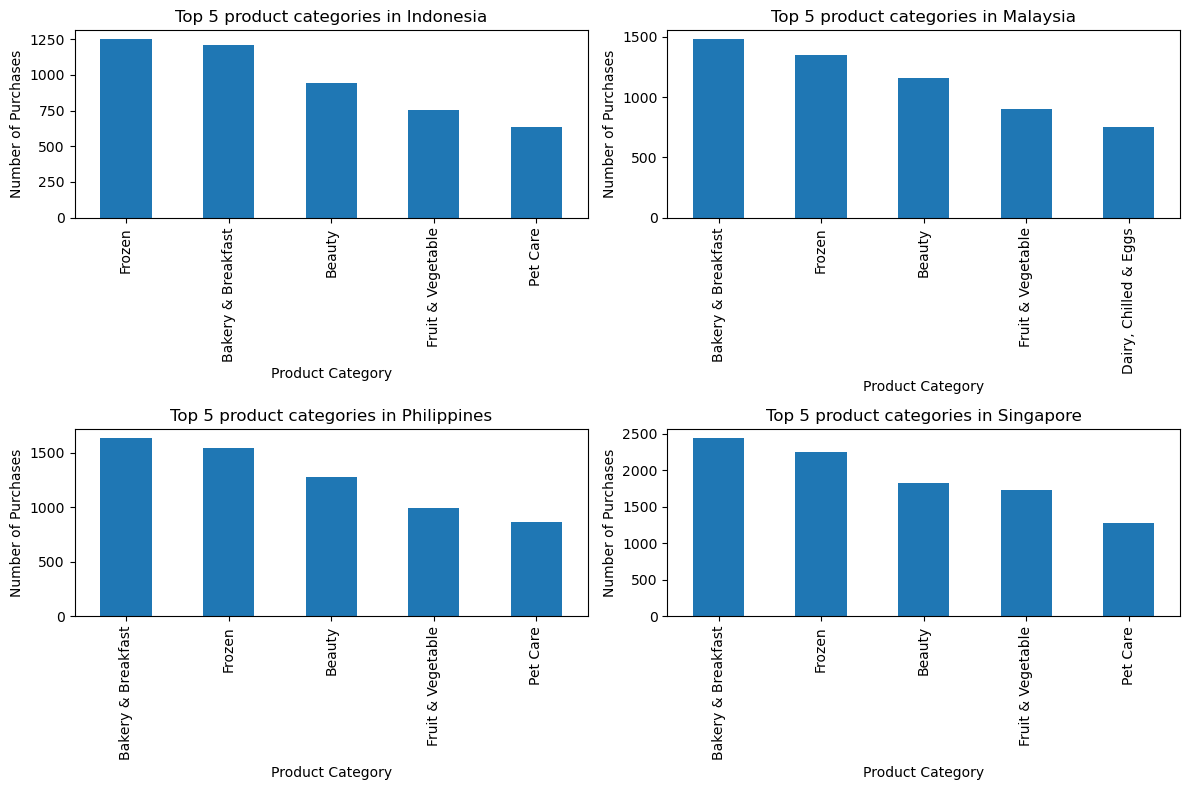

In [38]:
rows = 2  
cols = 2  
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
for i, (name, group) in enumerate(region_grouped):
    row = i // cols  
    col = i % cols  

    popular_categories = group['Category'].value_counts().head(5)  # Getting the top 5 categories
    popular_categories.plot(kind='bar', ax=axes[row, col], title=f"Top 5 product categories in {name}")
    axes[row, col].set_xlabel("Product Category")
    axes[row, col].set_ylabel("Number of Purchases")

plt.tight_layout()
plt.show()

*Бачимо, що в цілому топ 5 категорій збігаються, що свідчить про загальні споживчі уподобання та попит на данні товари у цих регіонах.
Важливо враховувати популярність різних категорій товарів при формуванні асортименту для кожної країни. Це може допомогти збільшити конверсію та задоволеність клієнтів.*

**1.3 Який спосіб оплати переважає в розрізі регіону?**

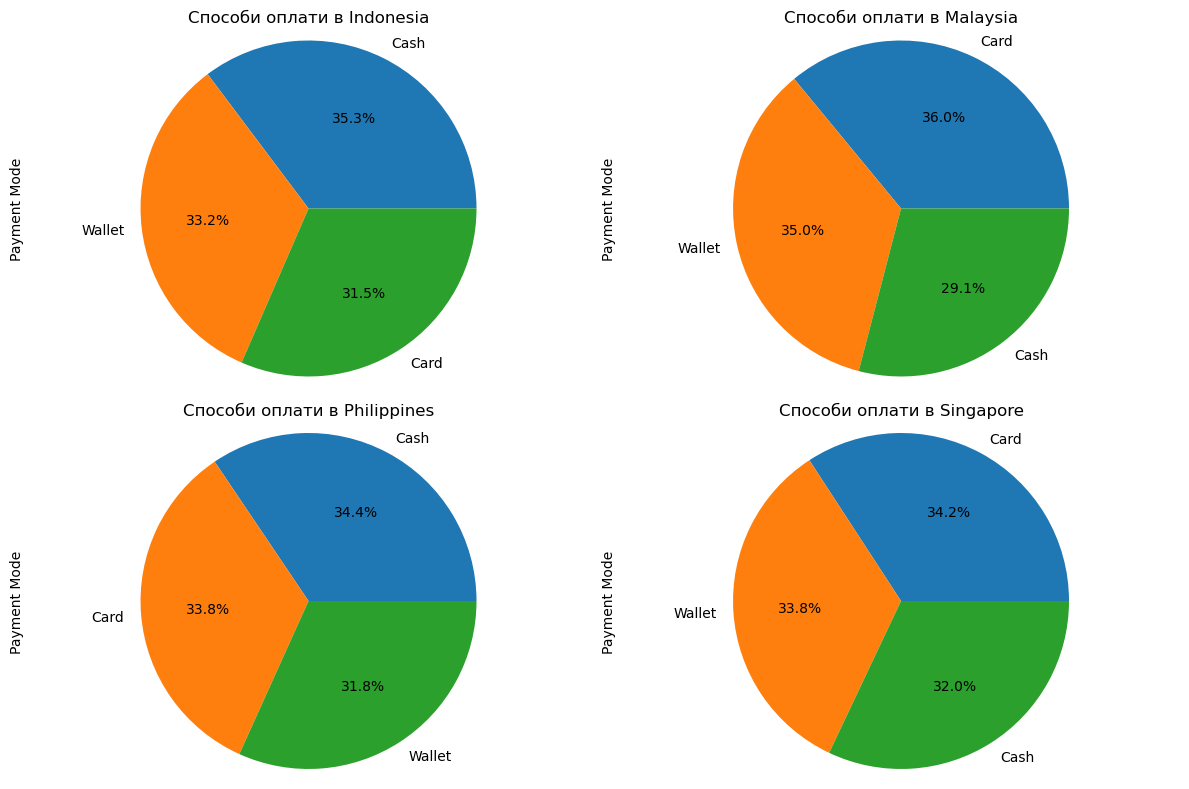

In [39]:
rows = 2  
cols = 2  

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, (name, group) in enumerate(region_grouped):
    row = i // cols  
    col = i % cols   

    payment_modes = group['Payment Mode'].value_counts()  
    payment_modes.plot(kind='pie', autopct='%1.1f%%', ax=axes[row, col], title=f"Способи оплати в {name}")
    axes[row, col].axis('equal')  

plt.tight_layout() 
plt.show()

*Готівка залишається популярним способом оплати в багатьох країнах. Важливо пам'ятати, що кожна країна має свої унікальні споживчі звички і попит на платіжні послуги. Бізнесам слід розглядати можливість розширення або адаптації своїх способів оплати відповідно до регіональних особливостей для забезпечення максимальної зручності та задоволення потреб клієнтів.*

**1.4 У які години найбільше продажів?**

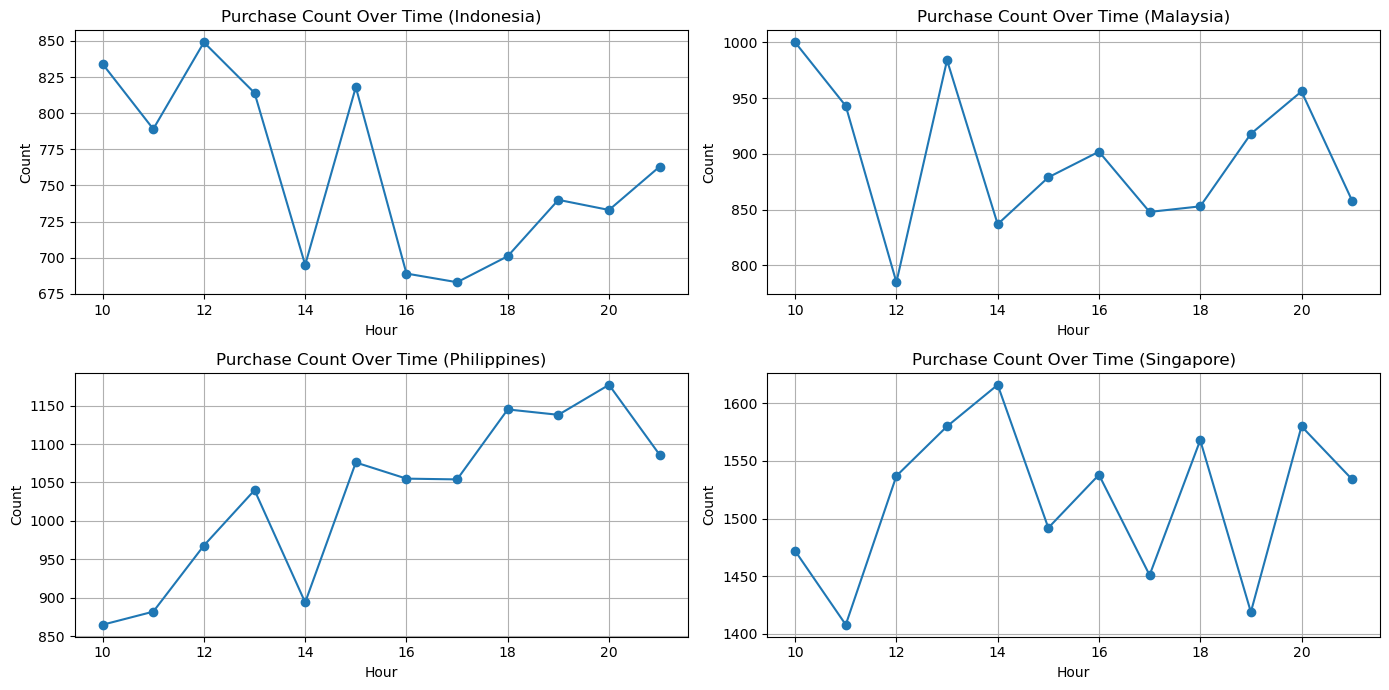

In [36]:
df_clean['hour'] = df_clean['Datetime'].dt.hour
hourly_purchase_by_country = df_clean.groupby(['Country', 'hour'])['Receipt Number'].count().reset_index()

countries = df_clean['Country'].unique()

graphs_per_row = 2

num_rows = len(countries) // graphs_per_row
if len(countries) % graphs_per_row != 0:
    num_rows += 1

fig, axs = plt.subplots(num_rows, graphs_per_row, figsize=(14, 7))

for i, country in enumerate(countries):
    row = i // graphs_per_row
    col = i % graphs_per_row
    country_data = hourly_purchase_by_country[hourly_purchase_by_country['Country'] == country]
    ax = axs[row, col]
    ax.plot(country_data['hour'], country_data['Receipt Number'], marker='o')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    ax.set_title(f'Purchase Count Over Time ({country})')
    
    ax.grid(True)

plt.tight_layout()
plt.show()


*Графіки покупок у різних країнах демонструють подібні закономірності з піками активності близько 12-14 годин (вдень) і приблизно 20 годин (вечір).*

*Однак між країнами спостерігаються помітні відмінності. Різниця в годинах пікових покупок може відображати відмінності в споживчих звичках і вподобаннях у різних країнах. Розуміння цих варіацій може бути цінним для аналізу споживчих тенденцій і планування оптимального часу для маркетингових ініціатив у певних регіонах.*

**1.5 Картками якого банку найчастіше користуються наші клієнти?**

In [37]:
transactions_by_country_bank = df_clean.groupby(['Country', 'Bank Name'])['Receipt Number'].count().reset_index()

popular_banks_by_country = transactions_by_country_bank.groupby('Country').apply(lambda x: x[x['Receipt Number'] == x['Receipt Number'].max()])

result_table = popular_banks_by_country[['Country', 'Bank Name']]
result_table.reset_index(drop=True, inplace=True)
print(result_table)


       Country                 Bank Name
0    Indonesia               BDO Unibank
1     Malaysia               BDO Unibank
2  Philippines  Philippine National bank
3    Singapore               BDO Unibank


*BDO Unibank часто зустрічається як популярний вибір, можливо, варто розглянути можливість партнерства або співпраці з цим банком. Це може призвести до вигідних угод, таких як спільні рекламні кампанії чи ексклюзивні пропозиції.*

# Аналіз клієнтів

**2.1 Які вікові групи є найактивнішими покупцями?**

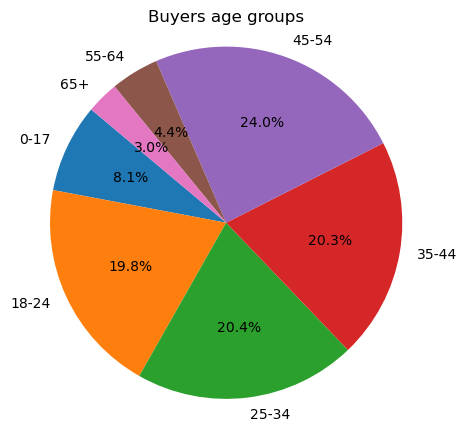

In [47]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df_clean['Age group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

purchase_count_by_age_group = df_clean.groupby('Age group')['Receipt Number'].count()

plt.figure(figsize=(5, 5))
plt.pie(purchase_count_by_age_group, labels=purchase_count_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Buyers age groups')
plt.axis('equal') 
plt.show()


*Можна побачити, що наша "цільова аудиторія" 18 - 54 роки, саме на них припадає майже 85% продажів.*

*Подивимось ще яка вікова група генерує найбільший прбуток (купує на найбільший чек)?*

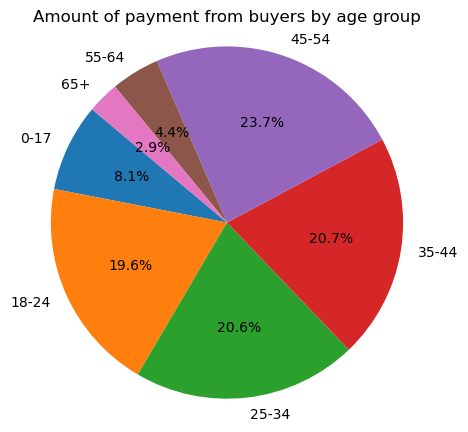

In [48]:
purchase_sum_by_age_group = df_clean.groupby('Age group')['Net Bill Amount Correct'].sum()

plt.figure(figsize=(5, 5))
plt.pie(purchase_sum_by_age_group, labels=purchase_sum_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Amount of payment from buyers by age group')
plt.axis('equal')
plt.show()


**2.2 Яка стать покупців переважає? Чи є різниця в покупцях за статтю?**

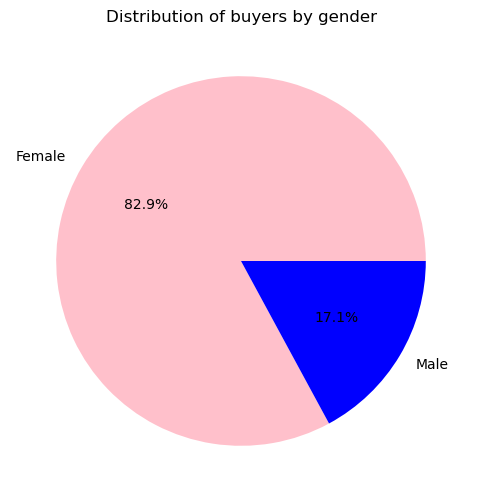

In [49]:
gender_distribution = df_clean['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Distribution of buyers by gender')
plt.show()


*Як бачимо, покупці жинки суттєво переважають.*

*Подивимось середній чек на який купують чоловіки та жінки.*

In [50]:
average_purchase_female = df_clean[df_clean['Gender'] == 'Female']['Net Bill Amount Correct'].mean()
average_purchase_male = df_clean[df_clean['Gender'] == 'Male']['Net Bill Amount Correct'].mean()

print("Average purchase amount for females: ${:.2f}".format(average_purchase_female))
print("Average purchase amount for males: ${:.2f}".format(average_purchase_male))

Average purchase amount for females: $11.22
Average purchase amount for males: $10.92


*На перший погляд сума не різниться суттєво. Перевіримо чи є статистично значуща ця різниця?*

In [51]:
data_female = df_clean[df_clean['Gender'] == 'Female']['Net Bill Amount Correct']
data_male = df_clean[df_clean['Gender'] == 'Male']['Net Bill Amount Correct']

t_stat, p_value = ttest_ind(data_female, data_male, equal_var=False)

print("t-stat:", t_stat)
print("p_value:", p_value)

alpha = 0.05  # рівень значущості
if p_value < alpha:
    print("The difference is statistically significant: there are reasons to evaluate the average checks in full.")
else:
    print("The difference is not statistically significant: there is no sufficient reason to consider the average checks to be different.")


t-stat: 2.8764024237206542
p_value: 0.004028864900015328
The difference is statistically significant: there are reasons to evaluate the average checks in full.


**2.3 Кількість унікальних покупців, тенденція по роках.**

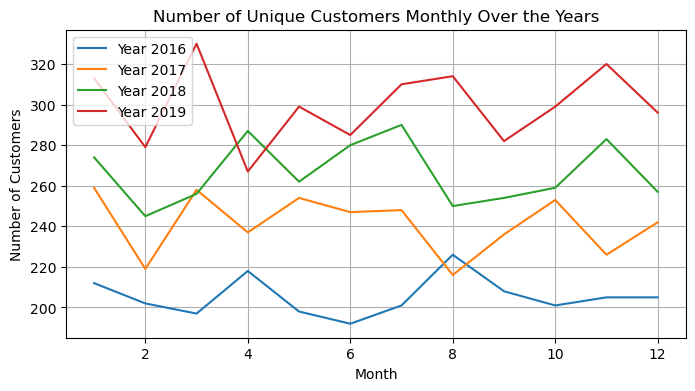

In [54]:
unique_customers_by_month = df_clean.groupby(['Year', 'Month'])['Mobile Number'].nunique().reset_index()

plt.figure(figsize=(8, 4))
for year in df_clean['Year'].unique():
    year_data = unique_customers_by_month[unique_customers_by_month['Year'] == year]
    plt.plot(year_data['Month'], year_data['Mobile Number'], label=f'Year {year}')

plt.title('Number of Unique Customers Monthly Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()


*Кількість унікальних клієнтів збільшується з кожним роком, що є позитивною тенденцією. Це може свідчити про зростання популярності бізнесу. Збільшення кількості унікальних клієнтів може також вказувати на ефективність маркетингових заходів та стратегій залучення нових клієнтів.*

# Аналіз прибутку

**3.1 Які продукти мають найбільший відсоток прибутку?**

In [44]:
profit_margin_by_category = df_clean.groupby('Category')['% Profit Margin'].mean()

highest_profit_category = profit_margin_by_category.idxmax()
highest_profit_margin = profit_margin_by_category.max() * 100

lowest_profit_category = profit_margin_by_category.idxmin()
lowest_profit_margin = profit_margin_by_category.min() * 100

print(f"Category with the highest average profit margin: {highest_profit_category}")
print(f"Highest average profit margin in this category: {highest_profit_margin:.1f} %\n")
print(f"Category with the lowest average profit margin: {lowest_profit_category}")
print(f"Lowest average profit margin in this category: {lowest_profit_margin:.1f} %\n")
print((profit_margin_by_category.sort_values(ascending=False) * 100).map('{:.1f}%'.format))


Category with the highest average profit margin: Party Supplies
Highest average profit margin in this category: 12.6 %

Category with the lowest average profit margin: Household
Lowest average profit margin in this category: 7.2 %

Category
Party Supplies               12.6%
Pet Care                     12.5%
Frozen                       12.3%
Bakery & Breakfast           11.6%
Choco, Snacks, Sweets        11.0%
Kitchen & Dining             10.9%
Fruit & Vegetable            10.7%
Mother & Baby                10.7%
Wines, Beers & Spirits       10.1%
Meat & Seafood               10.1%
Beauty                       10.0%
Rice & Cooking Essentials     9.5%
Beverages                     8.7%
Health                        8.5%
Dairy, Chilled & Eggs         7.3%
Household                     7.2%
Name: % Profit Margin, dtype: object


*Категорія "Подарункові товари" (Party Supplies) має найвищий середній показник рентабельності (12,6%). Це може вказувати на можливості для збільшення прибутку через цю категорію. Категорія "Household" має найнижчий середній показник рентабельності (7,2%). Бізнес може розглядати можливості для підвищення прибутковості цієї категорії, наприклад, шляхом оптимізації витрат або ціноутворення.*

**3.2 Динаміка чистого прибутку в залежності від року.**

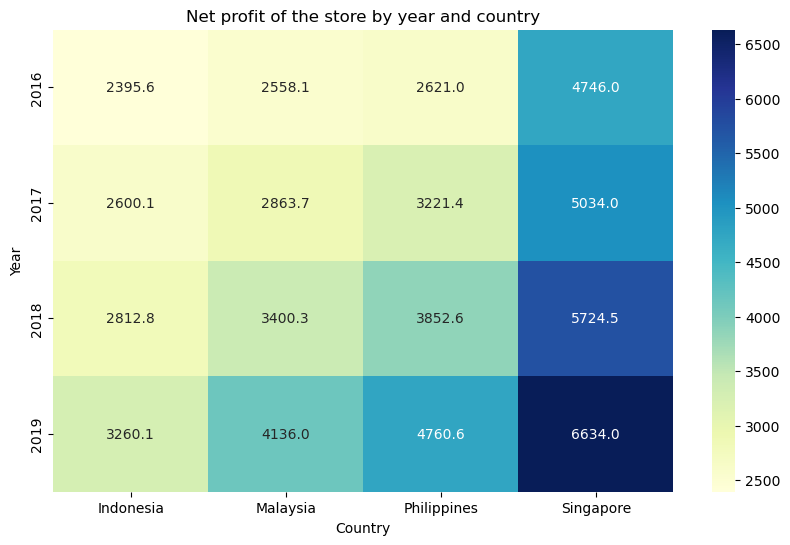

In [45]:
net_profit_by_year_country = df_clean.groupby(['Year', 'Country'])['Profit Margin'].sum().reset_index()

heatmap_data = net_profit_by_year_country.pivot(index='Year', columns='Country', values='Profit Margin')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Net profit of the store by year and country')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()


*Сінгапур вносить найбільший внесок у загальний прибуток та показує стабільний ріст прибутку протягом кількох років. Це є важливим сигналом для розвитку бізнесу в цьому регіоні.
Його варто розглянути для подальшого розширення та зосередження зусиль.*